In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate

In [2]:
import os
os.chdir('/home/dhruv.kumar/naman21266//Breast-Cancer-Subtype-from-MRI/4.1. ML Modelling/Final Pipeline')

In [3]:
print(os.getcwd())

/home/dhruv.kumar/naman21266/Breast-Cancer-Subtype-from-MRI/4.1. ML Modelling/Final Pipeline


In [4]:
classification = 'Mol Subtype'
data_path = os.getcwd() + "/Data/"
filename = data_path + "MAX_384_110.csv"
feature_file = data_path + "MAX_features.csv"
patient_colname = 'PatientID'
data = pd.read_csv(filename)
if 'sequence' in data.columns:
    data.pop('sequence')

In [5]:
data.head(10)

,PatientID,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,Breast_MRI_001,-0.485389,1.029859,4596.168146,0.789665,0.947554,2.420772,1.426658,0.505294,0.520707,...,29.154759,27.730849,29.563491,7386.250000,21.597176,1.266916,0.789318,2323.706419,0.314599,7420.0
1,Breast_MRI_002,0.215472,1.046495,533.445073,0.349089,0.205240,6.776109,1.209989,0.818271,0.274103,...,20.615528,18.027756,26.907248,627.916667,12.323176,2.064584,0.484359,732.124145,1.165957,656.0
2,Breast_MRI_003,-0.422027,1.012972,4052.123320,0.799151,0.974513,2.279587,1.254462,0.469413,0.504430,...,30.594117,39.408121,40.963398,7241.000000,22.776825,1.548343,0.645852,2802.530323,0.387036,7287.0
3,Breast_MRI_042,0.945754,1.042560,6871.865605,0.000000,0.022468,29.533455,1.475438,0.989662,0.038752,...,51.613952,46.324939,56.833089,6564.666667,28.276953,4.910244,0.203656,8325.219058,1.268186,6971.0
4,Breast_MRI_048,0.907116,1.076623,2099.857233,0.000000,0.038411,20.133936,1.350500,0.984780,0.061235,...,33.286634,33.600595,42.673177,1944.208333,24.037762,4.010912,0.249320,3021.498656,1.554102,2135.0
5,Breast_MRI_209,0.296135,1.076073,201.564911,0.248581,0.466950,5.160736,1.240000,0.755653,0.279630,...,10.816654,9.848858,11.832160,281.250000,7.570261,1.286304,0.777421,267.027484,0.949431,290.0
6,Breast_MRI_210,0.881477,1.066505,534.251717,0.000000,0.042404,10.426314,1.240734,0.981777,0.062028,...,19.723083,19.723083,23.086793,492.125000,13.604364,2.717572,0.367975,819.185415,1.664588,548.0
7,Breast_MRI_211,0.507636,1.053968,5653.068155,0.081777,0.226170,6.300373,1.369813,0.865367,0.182012,...,37.589892,35.114100,41.809090,6786.875000,25.560950,3.104280,0.322136,5381.354899,0.792906,6996.0
8,Breast_MRI_212,0.668657,1.011293,2023.170812,0.005474,0.077534,7.984800,1.242164,0.922182,0.118236,...,23.430749,22.203603,27.964263,2191.791667,17.849969,2.107879,0.474410,1720.003683,0.784748,2304.0
9,Breast_MRI_213,0.569296,1.013309,50680.476658,0.006694,0.250257,4.082020,1.332693,0.867704,0.156961,...,74.202426,78.102497,85.912746,64066.625000,54.275620,3.696701,0.270511,28623.299954,0.446774,64226.0


In [6]:
label_path = data_path + "Patient class labels.csv"
labels = pd.read_csv(label_path)[['Patient ID', classification]]
labels = labels.rename(columns = {classification: 'class'})

In [7]:
labels.head(10)

,Patient ID,class
0,Breast_MRI_001,2
1,Breast_MRI_002,3
2,Breast_MRI_003,0
3,Breast_MRI_004,0
4,Breast_MRI_005,1
5,Breast_MRI_006,0
6,Breast_MRI_007,1
7,Breast_MRI_008,1
8,Breast_MRI_009,3
9,Breast_MRI_010,3


In [8]:
features_with_labels = (pd.merge(data,
                                labels,
                                left_on = patient_colname,
                                right_on = 'Patient ID',
                                how = 'inner')
                        ).drop(columns = ['Patient ID',patient_colname])

y = features_with_labels.pop('class')
x = features_with_labels

In [9]:
os.chdir('/home/dhruv.kumar/naman21266/Breast-Cancer-Subtype-from-MRI/4.1. ML Modelling/Final Pipeline')

In [10]:
# Shap and Lime visualizations for visualiation of feature importance
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pickle as pkl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# import hyperopt
import shutil

In [11]:
data_path = os.getcwd() + "/Data/"
filename = data_path + "MAX_384_110.csv"
df = pd.read_csv(filename).drop(columns = 'sequence', errors='ignore')
total_features = df.drop('PatientID', axis = 1)
total_features

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.485389,1.029859,4596.168146,0.789665,0.947554,2.420772,1.426658,0.505294,0.520707,0.799685,...,29.154759,27.730849,29.563491,7386.250000,21.597176,1.266916,0.789318,2323.706419,0.314599,7420.0
1,0.215472,1.046495,533.445073,0.349089,0.205240,6.776109,1.209989,0.818271,0.274103,0.991420,...,20.615528,18.027756,26.907248,627.916667,12.323176,2.064584,0.484359,732.124145,1.165957,656.0
2,-0.422027,1.012972,4052.123320,0.799151,0.974513,2.279587,1.254462,0.469413,0.504430,0.671263,...,30.594117,39.408121,40.963398,7241.000000,22.776825,1.548343,0.645852,2802.530323,0.387036,7287.0
3,0.945754,1.042560,6871.865605,0.000000,0.022468,29.533455,1.475438,0.989662,0.038752,0.999982,...,51.613952,46.324939,56.833089,6564.666667,28.276953,4.910244,0.203656,8325.219058,1.268186,6971.0
4,0.907116,1.076623,2099.857233,0.000000,0.038411,20.133936,1.350500,0.984780,0.061235,0.999978,...,33.286634,33.600595,42.673177,1944.208333,24.037762,4.010912,0.249320,3021.498656,1.554102,2135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.158357,1.026672,1348.275326,0.350767,0.361304,5.795594,1.232035,0.758717,0.291971,0.944763,...,17.204651,17.804494,19.748418,1845.125000,14.188366,1.216829,0.821808,885.246494,0.479776,1864.0
380,-0.463199,1.016707,5352.889926,0.724892,0.780104,3.089325,1.264614,0.583873,0.499441,0.957628,...,33.241540,34.014703,34.146742,7636.541667,21.739680,1.330891,0.751376,2495.883655,0.326834,7668.0
381,0.416226,1.020740,5471.547525,0.347284,0.117092,10.666618,1.217698,0.832541,0.249518,0.997401,...,31.906112,31.240999,32.264532,6365.750000,25.502930,2.156412,0.463733,3581.916969,0.562686,6423.0
382,0.275731,1.034735,2015.883608,0.282851,0.246579,6.385481,1.304916,0.813178,0.255399,0.988793,...,25.806976,29.068884,36.482873,2481.458333,20.979451,3.072819,0.325434,2723.699135,1.097620,2583.0


In [12]:
x

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.485389,1.029859,4596.168146,0.789665,0.947554,2.420772,1.426658,0.505294,0.520707,0.799685,...,29.154759,27.730849,29.563491,7386.250000,21.597176,1.266916,0.789318,2323.706419,0.314599,7420.0
1,0.215472,1.046495,533.445073,0.349089,0.205240,6.776109,1.209989,0.818271,0.274103,0.991420,...,20.615528,18.027756,26.907248,627.916667,12.323176,2.064584,0.484359,732.124145,1.165957,656.0
2,-0.422027,1.012972,4052.123320,0.799151,0.974513,2.279587,1.254462,0.469413,0.504430,0.671263,...,30.594117,39.408121,40.963398,7241.000000,22.776825,1.548343,0.645852,2802.530323,0.387036,7287.0
3,0.945754,1.042560,6871.865605,0.000000,0.022468,29.533455,1.475438,0.989662,0.038752,0.999982,...,51.613952,46.324939,56.833089,6564.666667,28.276953,4.910244,0.203656,8325.219058,1.268186,6971.0
4,0.907116,1.076623,2099.857233,0.000000,0.038411,20.133936,1.350500,0.984780,0.061235,0.999978,...,33.286634,33.600595,42.673177,1944.208333,24.037762,4.010912,0.249320,3021.498656,1.554102,2135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.158357,1.026672,1348.275326,0.350767,0.361304,5.795594,1.232035,0.758717,0.291971,0.944763,...,17.204651,17.804494,19.748418,1845.125000,14.188366,1.216829,0.821808,885.246494,0.479776,1864.0
380,-0.463199,1.016707,5352.889926,0.724892,0.780104,3.089325,1.264614,0.583873,0.499441,0.957628,...,33.241540,34.014703,34.146742,7636.541667,21.739680,1.330891,0.751376,2495.883655,0.326834,7668.0
381,0.416226,1.020740,5471.547525,0.347284,0.117092,10.666618,1.217698,0.832541,0.249518,0.997401,...,31.906112,31.240999,32.264532,6365.750000,25.502930,2.156412,0.463733,3581.916969,0.562686,6423.0
382,0.275731,1.034735,2015.883608,0.282851,0.246579,6.385481,1.304916,0.813178,0.255399,0.988793,...,25.806976,29.068884,36.482873,2481.458333,20.979451,3.072819,0.325434,2723.699135,1.097620,2583.0


In [75]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

In [76]:
x.shape

(384, 110)

##################################################
Running pipeline: ER_PR_HER2


PermutationExplainer explainer: 385it [00:40,  7.25it/s]                         


##################################################
Running pipeline: PR_ER_HER2


PermutationExplainer explainer: 385it [00:16,  9.04it/s]                         


##################################################
Running pipeline: HER2_ER_PR


PermutationExplainer explainer: 385it [33:50,  5.30s/it]                         


##################################################
Running pipeline: HER2_PR_ER


PermutationExplainer explainer: 385it [00:25,  9.58it/s]                         


##################################################
Running pipeline: PR_HER2_ER


PermutationExplainer explainer: 385it [00:23,  9.41it/s]                         


##################################################
Running pipeline: ER_HER2_PR


PermutationExplainer explainer: 385it [33:48,  5.30s/it]                         


IndexError: index 2 is out of bounds for axis 0 with size 2

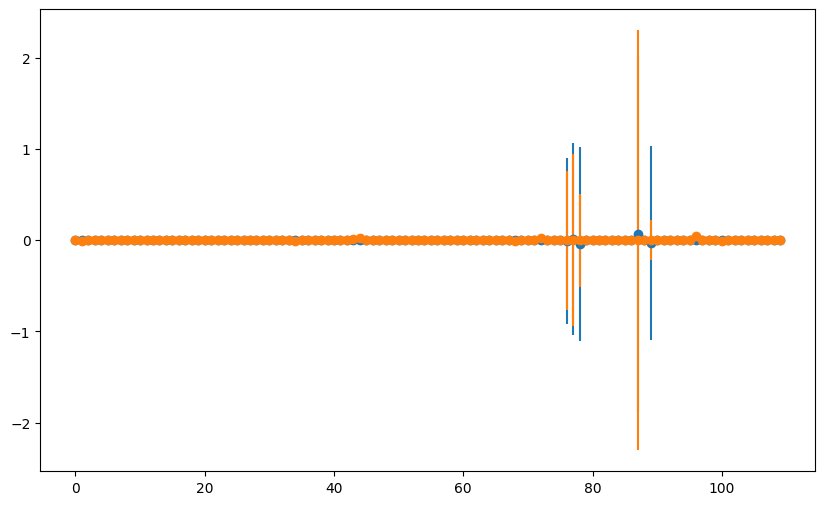

In [77]:
import os
import pickle as pkl
import shap
import numpy as np
import matplotlib.pyplot as plt

pipelines = ['ER_PR_HER2', 'PR_ER_HER2', 'HER2_ER_PR', 'HER2_PR_ER', 'PR_HER2_ER', 'ER_HER2_PR']
subtypes = ['ER', 'PR', 'HER2']
f1 = os.getcwd() + '/Results/MAX_384_110/Trained_Models/Best_Models'
FILE_INDEX = 2
# List of pipeline names
# Load models and calculate SHAP values for each pipeline
feature_imp = []
for pipeline in pipelines:
    print('#'*50)
    print(f'Running pipeline: {pipeline}')
    MODEL_PICKLING = f'{f1}/{pipeline}_{FILE_INDEX}.pkl'
    with open(MODEL_PICKLING, 'rb') as file:
        models = pkl.load(file)
    if (models[pipeline]['name'] == "Logistic Regression"):
        model = models[pipeline]['model']['lr']
    elif (models[pipeline]['name'] == "Random Forest"):
        model = models[pipeline]['model']['rf']
    elif (models[pipeline]['name'] == "Decision Tree"):
        model = models[pipeline]['model']['dt']
    elif (models[pipeline]['name'] == "SVM"):
        model = models[pipeline]['model']['svm']
    model.fit(x, y)
    explainer = shap.Explainer(model.predict, x)
    shap_values = explainer.shap_values(x)
    feature_imp.append(shap_values)
# Calculate confidence intervals for SHAP values
confidence_intervals = np.percentile(feature_imp, [2.5, 97.5], axis=0)

plt.figure(figsize=(10, 6))
for i in range(len(pipeline)):
    # Assuming each pipeline has the same number of features
    x_values = range(len(confidence_intervals[0]))
    y_values = np.mean(feature_imp[i], axis=0)
    y_err = np.abs(confidence_intervals[0] - y_values)
    plt.errorbar(x_values, y_values, yerr=y_err, fmt='o', label=pipelines[i])

    plt.xlabel('Feature Index')
    plt.ylabel('SHAP Value')
    plt.title('SHAP Values with 95% Confidence Intervals')
    plt.legend()
    plt.show()


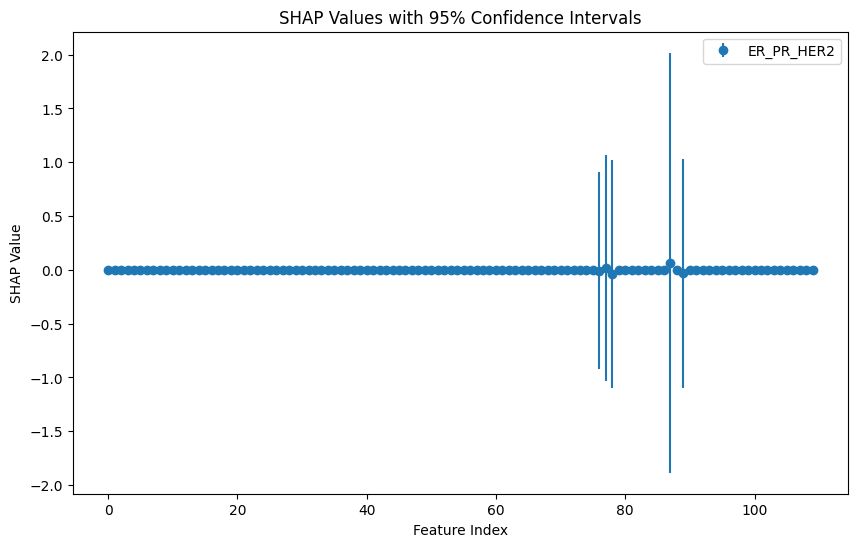

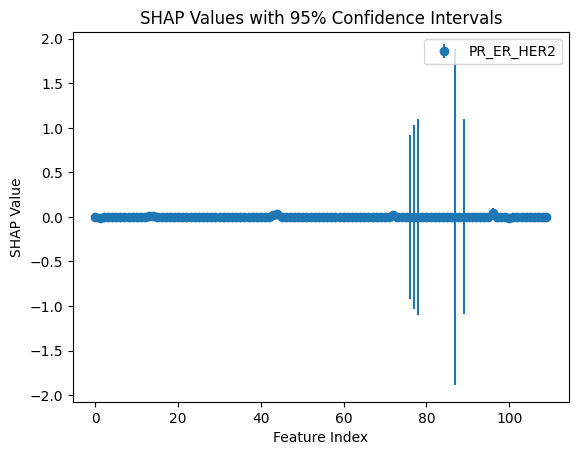

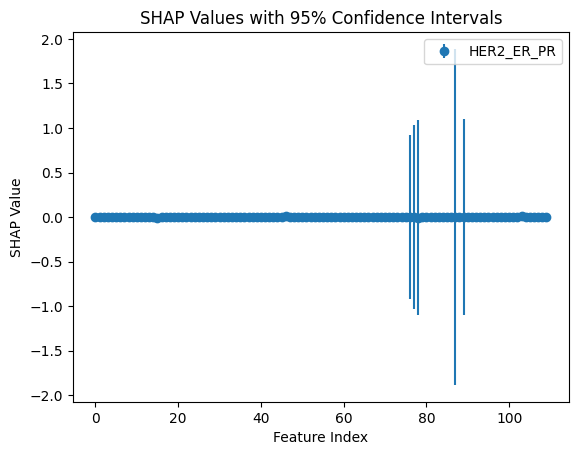

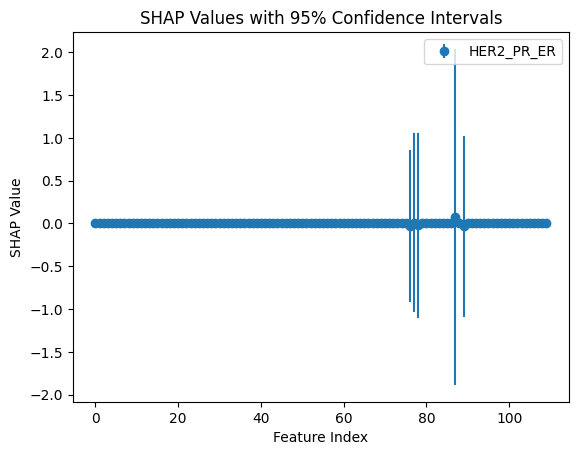

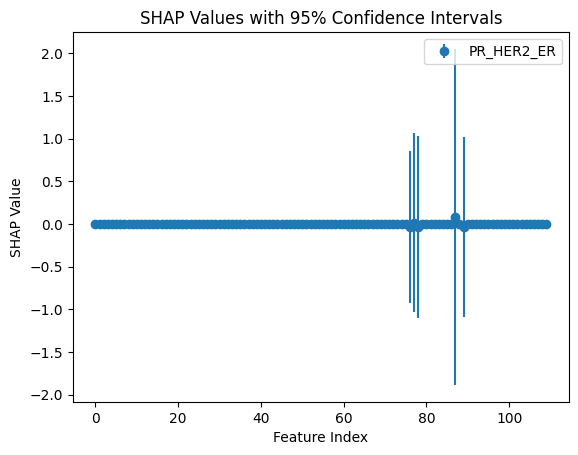

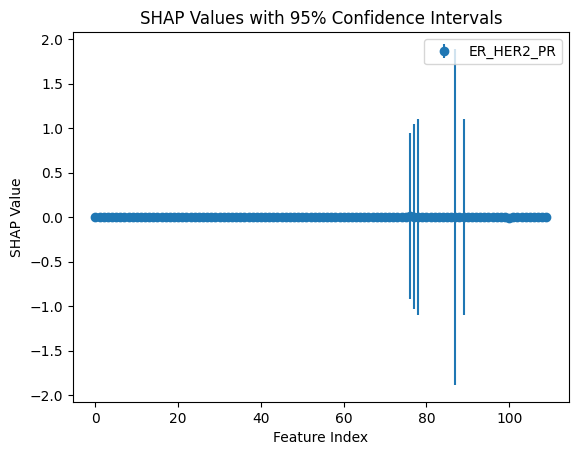

In [83]:
confidence_intervals = np.percentile(feature_imp[0], [2.5, 97.5], axis=0)

plt.figure(figsize=(10, 6))
for i in range(len(feature_imp)):
    # Assuming each pipeline has the same number of features
    x_values = range(len(confidence_intervals[0]))
    y_values = np.mean(feature_imp[i], axis=0)
    y_err = np.abs(confidence_intervals[0] - y_values)
    plt.errorbar(x_values, y_values, yerr=y_err, fmt='o', label=pipelines[i])

    plt.xlabel('Feature Index')
    plt.ylabel('SHAP Value')
    plt.title('SHAP Values with 95% Confidence Intervals')
    plt.legend()
    plt.show()

In [84]:
xnew_patient = np.array(x.iloc[0].tolist())

In [85]:
x.shape

(384, 110)

In [86]:
xnew_patient = xnew_patient.T
xnew_patient.T.shape

(110,)

In [50]:
print(feature_imp[0][0].shape)

(110,)


In [88]:
confidence_intervals = np.percentile(feature_imp[0], [2.5, 97.5], axis=0)

In [89]:
import shap
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
def hypothesis_test_and_plot_shap1(new_patient_shap_values, confidence_intervals, alpha=0.05):
    # Calculate the p-values for hypothesis testing (two-tailed)
    p_values = 2 * (1 - stats.norm.cdf(np.abs(new_patient_shap_values) / confidence_intervals[1]))
    significant_mask = p_values < alpha
    interval_lengths = np.abs(confidence_intervals[1] - confidence_intervals[0])
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(len(new_patient_shap_values)), new_patient_shap_values,
                 yerr=interval_lengths / 2,
                 fmt='o', label='SHAP Values')
    for i, sig in enumerate(significant_mask):
        if sig:
            plt.scatter(i, new_patient_shap_values[i], color='red', marker='*', s=100, label='Significant')
    
    plt.xlabel('Feature Index')
    plt.ylabel('SHAP Value')
    plt.title('SHAP Values with 95% Confidence Intervals and Significance')
    plt.legend()
    plt.show()


In [90]:
print(confidence_intervals.shape)

(2, 110)


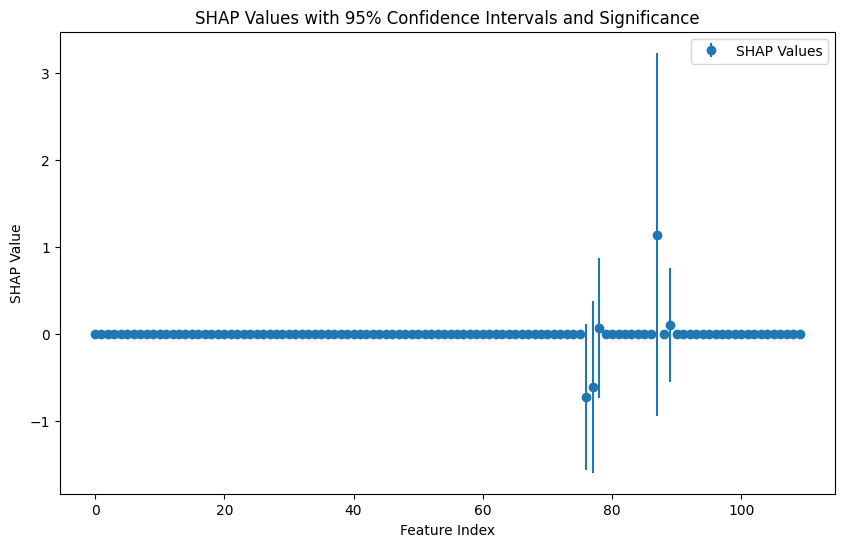

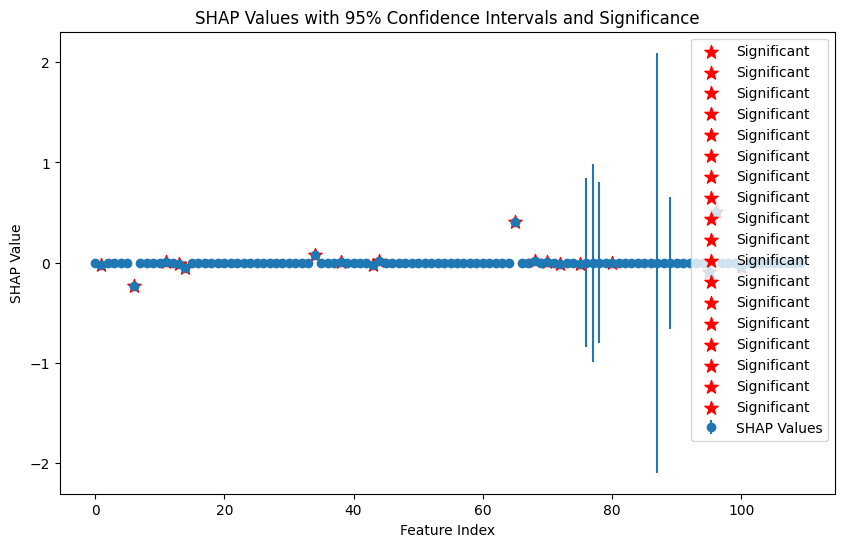

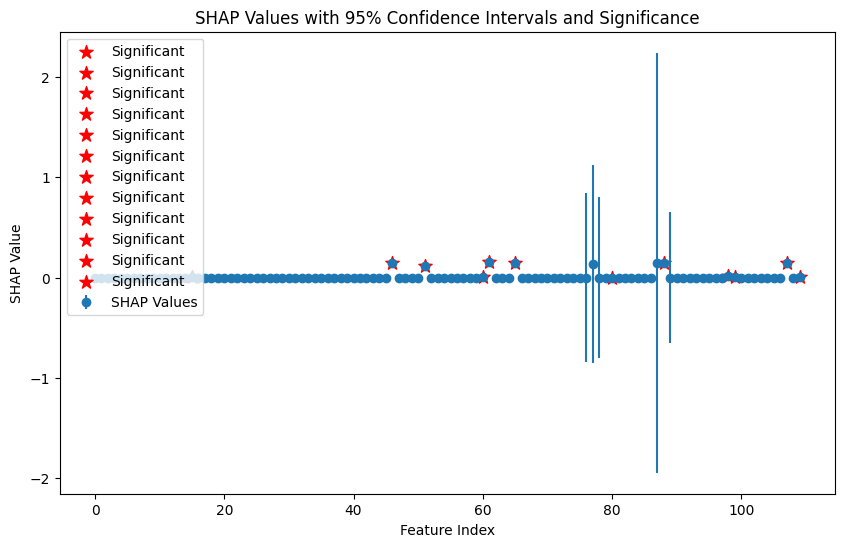

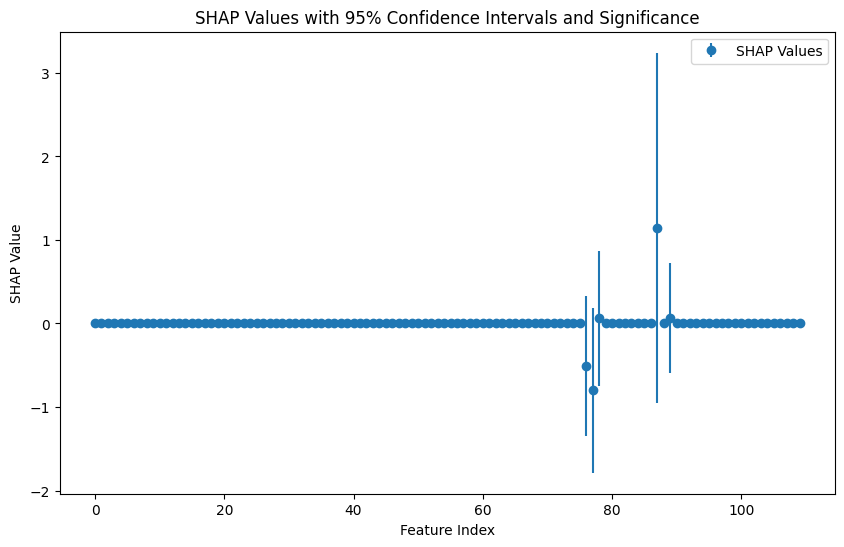

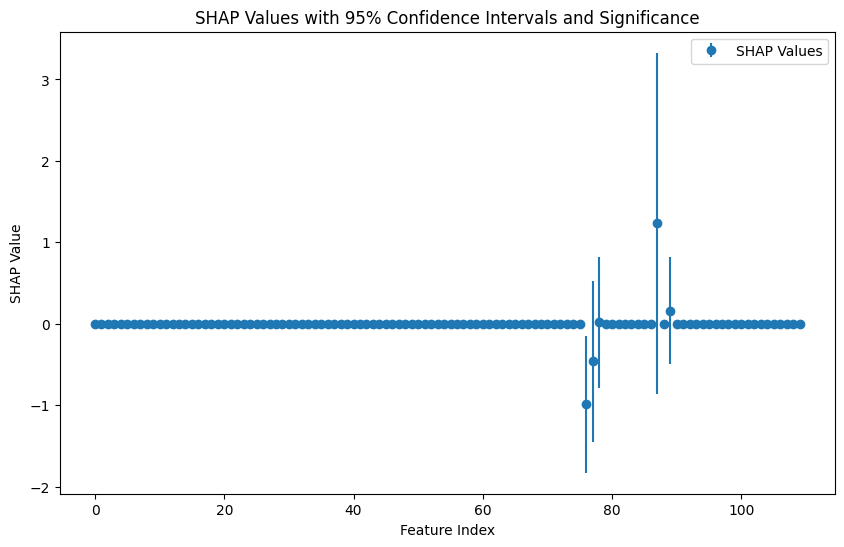

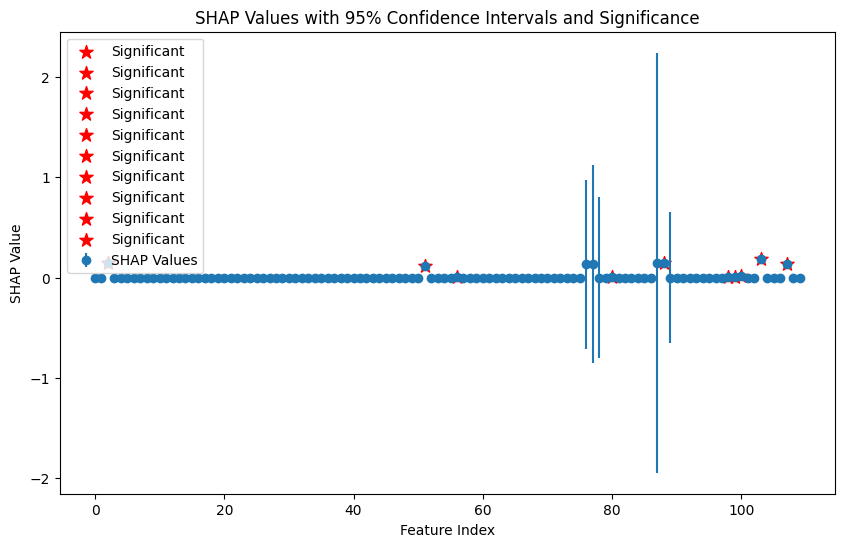

In [92]:
for i in range(len(feature_imp)):
    hypothesis_test_and_plot_shap1(feature_imp[i][0], confidence_intervals)